# Import & Review Data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [57]:
file = './data/trumptweets_all.csv'


In [58]:
trumptweets = pd.read_csv(file, encoding = 'latin1',
                          index_col='created_at')

In [59]:
trumptweets.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
12/28/2012 21:23,Twitter Web Client,@opus_6 Thanks it's a wonderful place to be--...,1,1,False,284771680499408896
12/28/2012 21:22,Twitter Web Client,@Earther57 Sounds nice--and thanks. Happy New...,3,2,False,284771320418410496
12/28/2012 21:20,Twitter Web Client,You have to set higher and higher goals. You...,1038,458,False,284770791126601728
12/28/2012 21:19,Twitter Web Client,Visiting New York City? Make sure to skate in...,72,38,False,284770536779829248
12/28/2012 21:13,Twitter Web Client,@sixelA1984 @LilJon @CelebApprentice Raising ...,2,1,False,284769064302280704


In [60]:
trumptweets.shape

(32959, 6)

# Prepare Data for Analysis

In [61]:
#Cast index of created_at dates to datetime format

trumptweets.index = pd.to_datetime(trumptweets.index)

In [62]:
#add new column for HOUR when the tweet occurred

trumptweets.loc[:, 'tweet_hour'] = trumptweets.index.hour

In [63]:
trumptweets.loc[:, 'source'].value_counts()

Twitter for Android         14545
Twitter Web Client          11978
Twitter for iPhone           4825
TweetDeck                     480
TwitLonger Beta               405
Instagram                     133
Media Studio                  130
Facebook                      105
Twitter Ads                    97
Twitter for BlackBerry         97
Mobile Web (M5)                56
Twitter for iPad               51
Twitlonger                     23
Vine - Make a Scene            10
Twitter QandA                  10
Periscope                       7
Neatly For BlackBerry 10        5
Twitter for Websites            1
Twitter Mirror for iPad         1
Name: source, dtype: int64

In [64]:
# Convert Source column to dummy variables

#map source twitter for the 19 source values into integers

trumptweets.loc[:, 'source_num'] = trumptweets.loc[:,'source'].map({'Twitter for Android':0,
                                                                    'Twitter Web Client':1,
                                                                    'Twitter for iPhone':2,
                                                                    'TweetDeck':3,
                                                                    'TwitLonger Beta':4,
                                                                    'Instagram':5,
                                                                    'Media Studio':6,
                                                                    'Facebook':7,
                                                                    'Twitter for BlackBerry':8,
                                                                    'Twitter Ads':9,
                                                                    'Mobile Web (M5)':10,
                                                                    'Twitter for iPad':11,
                                                                    'Twitlonger':12,
                                                                    'Twitter QandA':13,
                                                                    'Vine - Make a Scene':14,
                                                                    'Periscope':15,
                                                                    'Neatly For BlackBerry 10':16,
                                                                    'Twitter Mirror for iPad':17,
                                                                    'Twitter for Websites':18})

In [65]:
trumptweets.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str,tweet_hour,source_num
created_at,,,,,,,,
2012-12-28 21:23:00,Twitter Web Client,@opus_6 Thanks it's a wonderful place to be--...,1,1,False,284771680499408896,21,1
2012-12-28 21:22:00,Twitter Web Client,@Earther57 Sounds nice--and thanks. Happy New...,3,2,False,284771320418410496,21,1
2012-12-28 21:20:00,Twitter Web Client,You have to set higher and higher goals. You...,1038,458,False,284770791126601728,21,1
2012-12-28 21:19:00,Twitter Web Client,Visiting New York City? Make sure to skate in...,72,38,False,284770536779829248,21,1
2012-12-28 21:13:00,Twitter Web Client,@sixelA1984 @LilJon @CelebApprentice Raising ...,2,1,False,284769064302280704,21,1


In [66]:
#Convert Source_num to dummy variables

dummy_trumptweets = pd.get_dummies(trumptweets, columns=['source_num']).drop('source_num_0', axis=1)

In [67]:
# Rename Dummy variable columns

dummy_trumptweets.rename(columns={'source_num_1': 'src_web_client',
                                  'source_num_2': 'src_iphone',
                                  'source_num_3': 'src_tweetdeck',
                                  'source_num_4': 'src_twitlonger',
                                  'source_num_5': 'src_instagram',
                                  'source_num_6': 'src_mediastudio',
                                  'source_num_7': 'src_facebook',
                                  'source_num_8': 'src_bberry',
                                  'source_num_9': 'src_twitter_ads',
                                  'source_num_10': 'src_mobilewebm5',
                                  'source_num_11': 'src_ipad',
                                  'source_num_12': 'src_twitlonger',
                                  'source_num_13': 'src_qanda',
                                  'source_num_14': 'src_vine',
                                  'source_num_15': 'src_periscope',
                                  'source_num_16': 'src_neatly_bberry',
                                  'source_num_17': 'src_mirror_ipad',
                                  'source_num_18': 'src_forwebsites'}, 
                                  inplace=True)

In [68]:
#Create new column, engagement, that summs retweet and favorite counts.  This will become my target y

dummy_trumptweets.loc[:, 'engagement'] = (dummy_trumptweets.loc[:, 'retweet_count'] +
                                          dummy_trumptweets.loc[:, 'favorite_count'])

In [70]:
# Convert hours to morning, afternoon, evening, latenight dummy variables.  Timestamp column is in GMT, so converting daytime hours to EST
# Default is morning


# EST 12-6pm is GMT 18-23
dummy_trumptweets.loc[:, 'is_afternoon'] = ((dummy_trumptweets.loc[:, 'tweet_hour'] >= 17) & (dummy_trumptweets.loc[:,'tweet_hour'] < 23)).astype(int)  

# EST 6pm-12am is 23 - 5
dummy_trumptweets.loc[:, 'is_evening'] = ((dummy_trumptweets.loc[:, 'tweet_hour'] >= 23) | (dummy_trumptweets.loc[:,'tweet_hour'] < 5)).astype(int)

# Late Night is EST 12am-5am is GMT 5-10
dummy_trumptweets.loc[:, 'is_latenight'] = ((dummy_trumptweets.loc[:, 'tweet_hour'] >= 5) & (dummy_trumptweets.loc[:,'tweet_hour'] < 10)).astype(int)


In [71]:
# Only analyzing data since the 2016 Republican National Convention on 7/18/2016

dummy_trumptweets = dummy_trumptweets.loc[dummy_trumptweets.index > '2016-7-18 00:00:00',:]

# Analysis and Visualizations

In [72]:
#describe all

dummy_trumptweets.describe(include='all')

,source,text,retweet_count,favorite_count,is_retweet,id_str,tweet_hour,src_web_client,src_iphone,src_tweetdeck,...,src_qanda,src_vine,src_periscope,src_neatly_bberry,src_mirror_ipad,src_forwebsites,engagement,is_afternoon,is_evening,is_latenight
count,4675,4675,4675.000000,4675.000000,4675,4.675000e+03,4675.000000,4675.000000,4675.000000,4675.000000,...,4675.0,4675.0,4675.000000,4675.0,4675.0,4675.0,4675.000000,4675.000000,4675.000000,4675.000000
unique,8,4665,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Twitter for iPhone,MAKE AMERICA GREAT AGAIN!,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3341,7,NaN,NaN,4228,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16402.736898,60308.453904,NaN,8.542120e+17,12.643636,0.041711,0.714652,0.000428,...,0.0,0.0,0.000214,0.0,0.0,0.0,76711.190802,0.278503,0.263529,0.019037
std,NaN,NaN,13960.319769,48323.015209,NaN,6.611347e+16,6.973148,0.199950,0.451628,0.020681,...,0.0,0.0,0.014625,0.0,0.0,0.0,60347.751316,0.448310,0.440594,0.136671
min,NaN,NaN,0.000000,0.000000,NaN,7.549926e+17,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,8770.000000,23298.500000,NaN,7.889149e+17,10.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,32523.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,13781.000000,55454.000000,NaN,8.569286e+17,13.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,68421.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,20583.000000,86214.000000,NaN,9.131525e+17,19.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,106072.500000,1.000000,1.000000,0.000000


In [73]:
# try log(y)
# caution on interpretation of coefficients

# Because Log(0) returns infinite, set engagement to 1 where it was previously 0.
# Justifying this because 0 and 1 is insignificant as a low engagement tweets

zero_tweets = dummy_trumptweets.loc[:,'engagement'] == 0
dummy_trumptweets.loc[zero_tweets, 'engagement'] = 1

In [74]:
# add new column for log(engagement)

dummy_trumptweets.loc[:, 'log_engagement'] = np.log(dummy_trumptweets.loc[:,'engagement'])

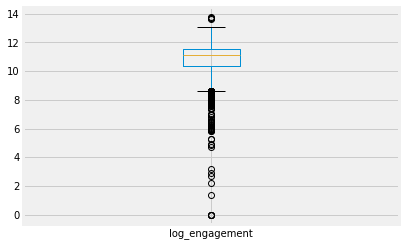

In [86]:
#boxplot of log(engagement)

dummy_trumptweets.loc[:,'log_engagement'].plot(kind='box')

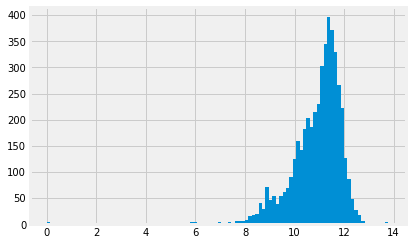

In [84]:
#Histogram of log(engagement)

dummy_trumptweets.loc[:, 'log_engagement'].hist(bins=100)

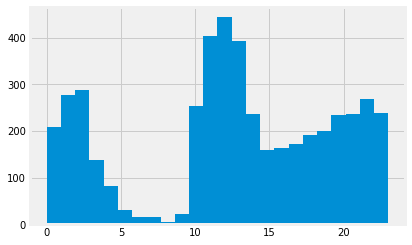

In [80]:
#Histogram of tweet_hour 

dummy_trumptweets.loc[:, 'tweet_hour'].hist(bins=24)

In [85]:
feature_cols = ['is_retweet', 
                'tweet_hour', 
                'src_iphone', 
                'src_web_client']

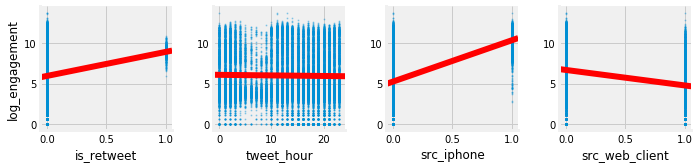

In [86]:
sns.pairplot(dummy_trumptweets,
            x_vars=feature_cols,
            y_vars='log_engagement',
            kind='reg',
            plot_kws={'scatter_kws': {'s':1, 'alpha':.3},
                      'line_kws': {'color':'red'}
                     }
            );

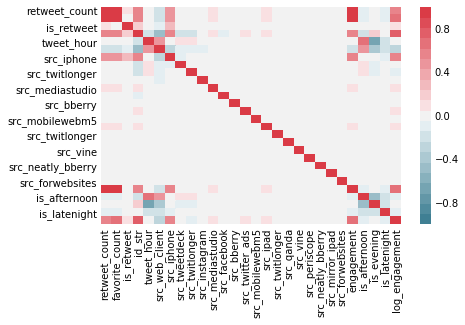

In [87]:
#Insert Correlation Matrix with HeatMap

sns.heatmap(dummy_trumptweets.corr(),
            vmin=-1,
            vmax = 1,
            cmap = sns.diverging_palette(220, 10, n=21),
            );

is_retweet


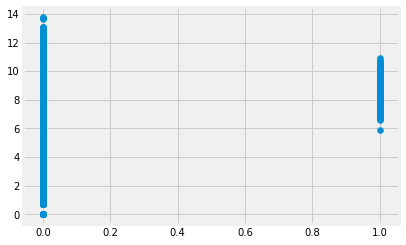

tweet_hour


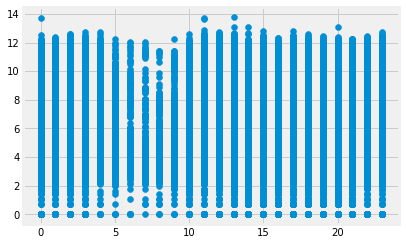

src_iphone


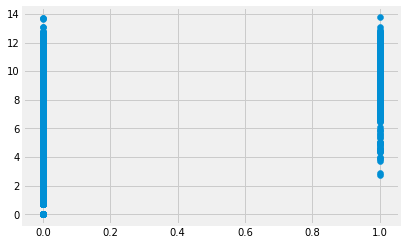

src_web_client


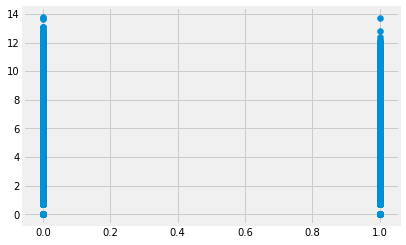

In [88]:
# Review Scatter plots

y = dummy_trumptweets.loc[:, 'log_engagement']

for var in feature_cols:
    print(var)
    x = dummy_trumptweets.loc[:, var]
    plt.scatter(x, y)
    plt.show()

# Linear Regression

In [89]:
feature_cols = ['is_retweet', 
                'tweet_hour', 
                'src_iphone', 
                'src_web_client']

In [90]:
X = dummy_trumptweets.loc[:, feature_cols]
y = dummy_trumptweets.loc[:, 'engagement']


In [91]:
#Split Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [92]:
# model on the training set of data

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
# predict on the test set for X

y_pred = lr.predict(X_test)

In [94]:
# compare predicted results against the test set

#print(metrics.mean_squared_error(y_train, lr.predict(X_train)))

print(metrics.mean_squared_error(y_test, y_pred))

836952257.895


In [95]:
#Create Benchmark of Mean Values

y_pred_null = np.ones(y_test.shape) * y_train.mean()

#compare y_test against the y_means
metrics.mean_squared_error(y_test, y_pred_null)

1219992673.6702051

In [96]:
print(lr.intercept_)
print(lr.coef_)

6457.82784523
[-46284.75738056    122.05880703  54059.23796534  -6545.66414166]
